# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# Get weather data
url = "http://api.openweathermap.org/data/2.5/weather?"

new_df=pd.DataFrame()
new_df["City"]=""
new_df["Cloudiness"]=""
new_df["Country"]=""
new_df["Date"]=""
new_df["Humidity"]=""
new_df["Lat"]=""
new_df["Lng"]=""
new_df["Max Temp"]=""
new_df["Wind Speed"]=""
record=0
set=0
print("Beginning Data Retrieval")
print("-------------------------------")
for x in range(len(cities)):
    try:
        query_url = url+"appid="+api_key+"&q="+cities[x]+"&units=imperial"
        response=requests.get(query_url).json()
        new_df.loc[x,"Cloudiness"]=response["clouds"]["all"]
        new_df.loc[x,"City"]=cities[x]
        new_df.loc[x,"Country"]=response["sys"]["country"]
        new_df.loc[x,"Date"]=response["dt"]
        new_df.loc[x,"Humidity"]=response["main"]["humidity"]
        new_df.loc[x,"Lat"]=response["coord"]["lat"]
        new_df.loc[x,"Lng"]=response["coord"]["lon"]
        new_df.loc[x,"Max Temp"]=response["main"]["temp_max"]
        new_df.loc[x,"Wind Speed"]=response["wind"]["speed"]
        print("Processing Record "+str(record)+" of Set "+str(set)+" | "+cities[x])
        print(query_url)
        if record<49:
            record=record+1
        elif record==49:
            record=0
            set=set+1
    except:
        print("City not found. Skipping...")
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 0 of Set 0 | tecoanapa
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=tecoanapa&units=imperial
Processing Record 1 of Set 0 | mecca
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=mecca&units=imperial
City not found. Skipping...
Processing Record 2 of Set 0 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=chokurdakh&units=imperial
Processing Record 3 of Set 0 | oistins
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=oistins&units=imperial
Processing Record 4 of Set 0 | tiarei
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=tiarei&units=imperial
Processing Record 5 of Set 0 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=mataura&units=imperial
Processing 

Processing Record 3 of Set 1 | grand haven
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=grand haven&units=imperial
Processing Record 4 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=atuona&units=imperial
Processing Record 5 of Set 1 | ayan
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=ayan&units=imperial
Processing Record 6 of Set 1 | avera
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=avera&units=imperial
Processing Record 7 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=busselton&units=imperial
Processing Record 8 of Set 1 | necochea
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=necochea&units=imperial
Processing Record 9 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=13747a9b

Processing Record 5 of Set 2 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=hithadhoo&units=imperial
Processing Record 6 of Set 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=port alfred&units=imperial
Processing Record 7 of Set 2 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=praia da vitoria&units=imperial
City not found. Skipping...
Processing Record 8 of Set 2 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=cape town&units=imperial
Processing Record 9 of Set 2 | shingu
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=shingu&units=imperial
Processing Record 10 of Set 2 | gondar
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=gondar&units=imperial
Processing Record 11 of Set 2 | boa vista

Processing Record 8 of Set 3 | upernavik
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=upernavik&units=imperial
Processing Record 9 of Set 3 | rexburg
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=rexburg&units=imperial
Processing Record 10 of Set 3 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=bredasdorp&units=imperial
Processing Record 11 of Set 3 | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=talnakh&units=imperial
Processing Record 12 of Set 3 | buala
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=buala&units=imperial
Processing Record 13 of Set 3 | nouakchott
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=nouakchott&units=imperial
Processing Record 14 of Set 3 | thinadhoo
http://api.openweathermap.org/data/2.5/wea

Processing Record 11 of Set 4 | lasa
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=lasa&units=imperial
Processing Record 12 of Set 4 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=codrington&units=imperial
Processing Record 13 of Set 4 | fuling
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=fuling&units=imperial
Processing Record 14 of Set 4 | umm lajj
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=umm lajj&units=imperial
Processing Record 15 of Set 4 | prachuap khiri khan
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=prachuap khiri khan&units=imperial
City not found. Skipping...
Processing Record 16 of Set 4 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=svetlogorsk&units=imperial
Processing Record 17 of Set 4 | va

Processing Record 14 of Set 5 | teknaf
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=teknaf&units=imperial
Processing Record 15 of Set 5 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=nanortalik&units=imperial
Processing Record 16 of Set 5 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=karratha&units=imperial
Processing Record 17 of Set 5 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=kruisfontein&units=imperial
Processing Record 18 of Set 5 | cochrane
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=cochrane&units=imperial
Processing Record 19 of Set 5 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=severo-kurilsk&units=imperial
Processing Record 20 of Set 5 | puerto escondido
http://api.op

Processing Record 16 of Set 6 | changping
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=changping&units=imperial
Processing Record 17 of Set 6 | pasni
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=pasni&units=imperial
Processing Record 18 of Set 6 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=pisco&units=imperial
Processing Record 19 of Set 6 | saint-louis
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=saint-louis&units=imperial
Processing Record 20 of Set 6 | marquette
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=marquette&units=imperial
Processing Record 21 of Set 6 | dalbandin
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=dalbandin&units=imperial
Processing Record 22 of Set 6 | abu dhabi
http://api.openweathermap.org/data/2.5/w

Processing Record 18 of Set 7 | laurel
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=laurel&units=imperial
Processing Record 19 of Set 7 | babushkin
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=babushkin&units=imperial
Processing Record 20 of Set 7 | mankono
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=mankono&units=imperial
Processing Record 21 of Set 7 | port augusta
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=port augusta&units=imperial
Processing Record 22 of Set 7 | talara
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=talara&units=imperial
City not found. Skipping...
Processing Record 23 of Set 7 | bad liebenwerda
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=bad liebenwerda&units=imperial
Processing Record 24 of Set 7 | balkhash

City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 8 | banamba
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=banamba&units=imperial
Processing Record 23 of Set 8 | fort frances
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=fort frances&units=imperial
Processing Record 24 of Set 8 | kathu
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=kathu&units=imperial
Processing Record 25 of Set 8 | horsham
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=horsham&units=imperial
Processing Record 26 of Set 8 | jardim
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=jardim&units=imperial
Processing Record 27 of Set 8 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=constitucion&units=imperial
Processing Record 28 of 

Processing Record 25 of Set 9 | pullman
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=pullman&units=imperial
Processing Record 26 of Set 9 | hokitika
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=hokitika&units=imperial
Processing Record 27 of Set 9 | eureka
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=eureka&units=imperial
Processing Record 28 of Set 9 | santa rosa
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=santa rosa&units=imperial
Processing Record 29 of Set 9 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=coihaique&units=imperial
City not found. Skipping...
Processing Record 30 of Set 9 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=13747a9bb2c7eea407daab6a34d96865&q=vila franca do campo&units=imperial
Processing Record 31 of Set 9 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
new_df.to_csv("./Images/WeatherPy.csv", encoding="utf-8", index=False)


In [37]:
new_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tecoanapa,5,MX,1554219900,48,16.99,-99.26,84.2,5.82
1,mecca,0,SA,1554222300,12,21.43,39.83,81.5,8.75
3,chokurdakh,68,RU,1554222300,77,70.62,147.9,4.91,3.38
4,oistins,20,BB,1554217200,58,13.07,-59.53,84.2,25.28
5,tiarei,80,PF,1554222149,74,-17.53,-149.33,82.4,4.7


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

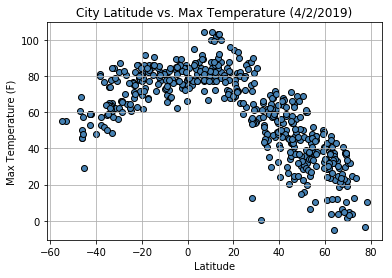

In [53]:
plt.scatter(new_df["Lat"],new_df["Max Temp"],color="steelblue", alpha=1, marker="o", linewidth=1, edgecolors="black")
plt.title("City Latitude vs. Max Temperature (4/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("./Images/Lat_vs_Max_Temp.png")

#### Latitude vs. Humidity Plot

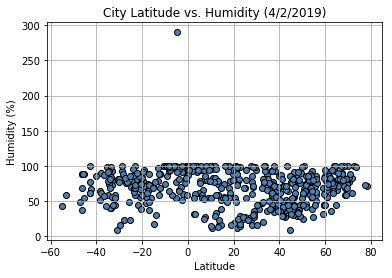

In [54]:
plt.scatter(new_df["Lat"],new_df["Humidity"],color="steelblue", alpha=1, marker="o", linewidth=1, edgecolors="black")
plt.title("City Latitude vs. Humidity (4/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("./Images/Lat_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

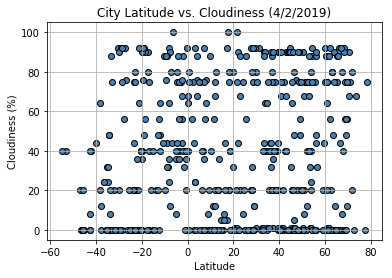

In [55]:
plt.scatter(new_df["Lat"],new_df["Cloudiness"],color="steelblue", alpha=1, marker="o", linewidth=1, edgecolors="black")
plt.title("City Latitude vs. Cloudiness (4/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("./Images/Lat_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

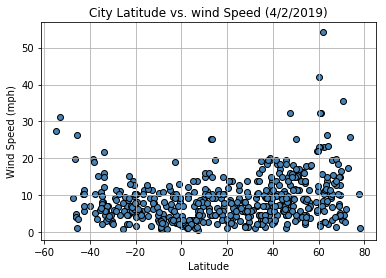

In [56]:
plt.scatter(new_df["Lat"],new_df["Wind Speed"],color="steelblue", alpha=1, marker="o", linewidth=1, edgecolors="black")
plt.title("City Latitude vs. wind Speed (4/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("./Images/Lat_vs_Wind_Speed.png")

In [58]:
new_df.loc[new_df["Humidity"]>200]
query_url = url+"appid="+api_key+"&q="+"talara"+"&units=imperial"
response=requests.get(query_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -4.58, 'lon': -81.27},
 'dt': 1554220800,
 'id': 3691582,
 'main': {'humidity': 290,
          'pressure': 1014,
          'temp': 62.6,
          'temp_max': 62.6,
          'temp_min': 62.6},
 'name': 'Talara',
 'sys': {'country': 'PE',
         'id': 8685,
         'message': 0.0041,
         'sunrise': 1554204405,
         'sunset': 1554247818,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 217.501, 'speed': 9.08}}
